## K means ++ clustering by own functions
    This code goes thought the initial functions defined for the k_means to run smoothly and then the functions defined for the evaluating the score (To find the optimal number of clusters using WCSS(Within Cluster Squares Sum) and Silhouette score

In [1]:
# Importing the libraries needed...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The below function initializes the centroid for the Kmeans

In [2]:
# Initializing centroid... Here we will use random data selection as centroid
def init_centroids_Kmeans(train_data,No_clusters):
    Rand_index = np.random.permutation(train_data.shape[0])
    Init_centroids = train_data[Rand_index[0:No_clusters]]
    return Init_centroids

# Initializing centroid... (K_means++) Here we will use random data selection as first centroid and choose the next point fatherest 
# from the prevoious clusters to ensure good initialization
def init_centroids_Kmeanspp(train_data,No_clusters):
    m,n = train_data.shape
    Init_Centroid = np.array([])
    np.random.seed(45)
    # Initial point
    Rand_in = np.random.randint(0,len(train_data),(1,1))
    Init_Centroid = np.append(Init_Centroid,train_data[Rand_in[0]])
    Init_Centroid = np.reshape(Init_Centroid,(1,n))
    K=No_clusters-1
    for i in range(K):
        train_dist_dat = np.array([])
        for j in range(i+1):
            dist_mat = np.linalg.norm(train_data-Init_Centroid[j],2,axis=1)**2
            train_dist_dat= np.append(train_dist_dat,dist_mat)

        train_dist_dat = (np.reshape(train_dist_dat,(i+1,train_data.shape[0])))
        # finding the point with maximum distance from the nearest centroid
        if train_dist_dat.shape[0] == 1:
            Index_of_new_centroid = np.argmax(train_dist_dat)
        else:
            finding_nearest_centroid_dist = np.min(train_dist_dat,axis=0)
            Index_of_new_centroid = np.argmax(finding_nearest_centroid_dist)

        Init_Centroid = np.append(Init_Centroid,train_data[Index_of_new_centroid])
        Init_Centroid = np.reshape(Init_Centroid,(i+2,n))
    

    return Init_Centroid


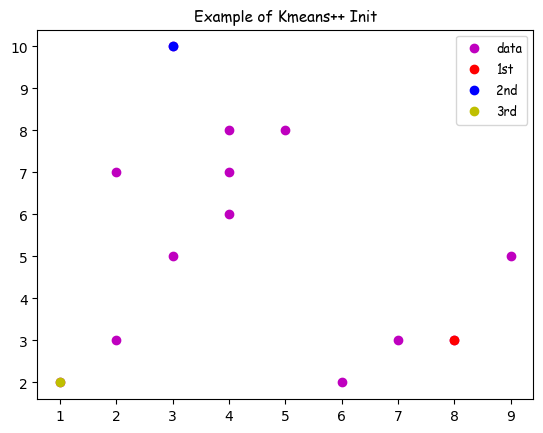

In [3]:
#(EXAMPLE) Checking the Initial centroid K_Means++ ... (Example)
No_clusters = 3
Max_iter = 100

training_dat = np.array([[1,2],[2,3],[3,5],[4,7],[3,10],[5,8],[4,8],[7,3],[6,2],[4,6],[2,7],[8,3],[9,5]])
Init_cen = init_centroids_Kmeanspp(training_dat,3)
plt.figure()
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 11,
        }
plt.plot(training_dat[:,0],training_dat[:,1],'om',label='data')
plt.plot(Init_cen[0,0],Init_cen[0,1],'or',label='1st') # red is the first
plt.plot(Init_cen[1,0],Init_cen[1,1],'ob',label='2nd') # blue is the second
plt.plot(Init_cen[2,0],Init_cen[2,1],'oy',label='3rd') # yellow is the third
plt.title('Example of Kmeans++ Init',font)
plt.legend(loc='best',prop={'family': 'Comic Sans MS','size': 9})
plt.show()

The below function is for computing closest index for each iteration when the cluster centers are known

In [4]:
# Computing the index of closest cluster centers ... 
def find_closest_cluster_center(clus_center_vals,train_data,no_centriods):
    index_centroid = np.zeros((train_data.shape[0]))
    for i in range(train_data.shape[0]):
        dist = 1000000
        index = 0
        for j in range(no_centriods):
            dist_new = np.linalg.norm(train_data[i] - clus_center_vals[j],2)**2
            if dist_new<dist:
                dist = dist_new
                index = j
        index_centroid[i] = index
    return index_centroid

# Computing the index of closest cluster centers ... (Vectorial notation--faster)
def find_closest_cluster_center_Vec(clus_center_vals,train_data):
    index_centroid = np.zeros((train_data.shape[0]))
    for i in range(train_data.shape[0]):
        dist_mat = np.linalg.norm(clus_center_vals - train_data[i],2,axis=1)**2
        index_centroid[i] = np.argmin(dist_mat)
    return index_centroid 

Computing the new median when the index of each cluster center is found from the above function.

In [5]:
# Computing the mean of the given dataset and index
def new_median_cluster_centers(train_data,index,No_clusters):
    m,n = train_data.shape
    Centriods = np.zeros((No_clusters,n))
    num = np.zeros((No_clusters,1))
    j=0
    int_in = index.astype('int32')
    for i in int_in:
        Centriods[i]+=train_data[j]
        num[i]+=1
        j+=1
    Centriods/=num
    return Centriods

The below function combines the above functions and runs the Kmeans++

In [6]:
# Running the K_Means++ algorithm ...
def Run_K_meanspp(train_data,No_of_clusters,Max_iter):
    
    m,n = train_data.shape
    K = No_of_clusters
    Init_cluster_center = init_centroids_Kmeanspp(train_data,K) ## Change this if u want normal K_means to run...
    cost = np.array([])
    not_converged = 1
    num=0
    cost_old = 10000000000
    while num<Max_iter and not_converged :
        if num>=Max_iter:
            break
        num+=1
        Index = find_closest_cluster_center_Vec(Init_cluster_center,train_data)
        new_centroids = new_median_cluster_centers(train_data,Index,K)

        cost_iter = 0
        j=0
        int_index = Index.astype('int32')
        for i in int_index:
            cost_iter += np.linalg.norm(train_data[j]-new_centroids[i],2)**2
            j+=1
        cost_iter/=m
        cost = np.append(cost,cost_iter)

        if cost_old - cost_iter < 0.01:
            break
        cost_old = cost_iter
        Init_cluster_center = new_centroids
    return Init_cluster_center,int_index,cost

Cost:  [3.17982456 3.17982456]


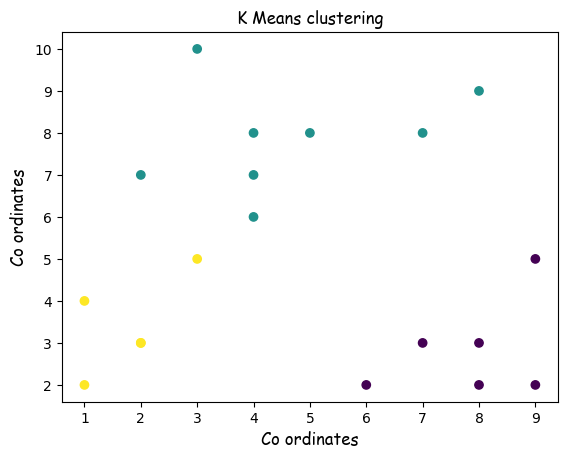

In [7]:
#(EXAMPLE) Preparing for K_Means ... (Example)
No_clusters = 3
Max_iter = 100

training_dat = np.array([[1,2],[2,3],[1,4],[2,3],[7,8],[8,9],[3,5],[4,7],[3,10],[5,8],[4,8],[7,3],[6,2],[4,6],[2,7],[8,3],[9,5],[9,2],[8,2]])
Clusters,indices,cost123 = Run_K_meanspp(training_dat,No_clusters,Max_iter)
#print("Cluster centroids:",Clusters)
#print("Index: ",indices)
print("Cost: ",cost123)

X=training_dat[:,0]
Y=training_dat[:,1]

plt.figure()
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
plt.xlabel("Co ordinates",font)
plt.ylabel("Co ordinates",font)
plt.title("K Means clustering",font)
plt.scatter(X,Y,c=indices)
plt.show()

To find the optimal clusters using WCSS method (Elbow Method)

In [8]:
# Finding the optimal number of clusters from elbow method... (WCSS)
def Optimal_cluster_count_WCSS(training_dat,Chk_cluster_count):
    WCSS = np.array([])
    for cluster in range(1,Chk_cluster_count+1,1):
        Clusters,indices,cost123 = Run_K_meanspp(training_dat,cluster,Max_iter)
        WCSS = np.append(WCSS,cost123[-1])

    plt.figure()
    plt.plot(np.linspace(1,Chk_cluster_count,Chk_cluster_count),WCSS,'-or')
    font = {'family': 'Comic Sans MS',
            'color':  'black',
            'weight': 'normal',
            'size': 10,
            }
    bigfont = {'family': 'Comic Sans MS',
            'color':  'black',
            'weight': 'bold',
            'size': 12,
            }
    plt.title('Within Cluster Sum Square',bigfont)
    plt.xlabel('No. clusters',font)
    plt.ylabel('WCSS',font)
    plt.show()

    return WCSS


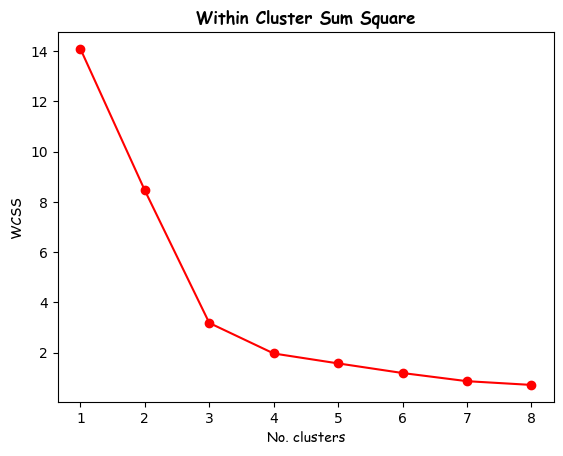

In [9]:
#plotting for our example
Chk_cluster_count = 8
training_dat = np.array([[1,2],[2,3],[1,4],[2,3],[7,8],[8,9],[3,5],[4,7],[3,10],[5,8],[4,8],[7,3],[6,2],[4,6],[2,7],[8,3],[9,5],[9,2],[8,2]])

WCSS_example = Optimal_cluster_count_WCSS(training_dat,Chk_cluster_count)

Here the 3 cluster seems to be the elbow point and is the optimal number of clusters for our example.

Now lets look for another common method for finding optimal cluster number. The method defined below is the Silhouette score method. More details
can be viewed in https://en.wikipedia.org/wiki/Silhouette_(clustering) the link given.

In [10]:
def Silhouttes_method_optimal_cluster(training_dat,Max_no_cluster):
    Silhouttes_final = np.array([])
    for cluster_num in range(2,Max_no_cluster+1,1):
        Clusters,indices123,cost123 = Run_K_meanspp(training_dat,cluster_num,1000)

        #lets calculate the a and b
        a = np.array([])
        b = np.array([])
        S = np.array([])
        for i in range(len(training_dat)):
            # a
            Ind = indices123[i]
            Same_Cluster_index_data = np.where(indices123==Ind)
            Data_ind = training_dat[Same_Cluster_index_data]-training_dat[i]
            dist = np.linalg.norm(Data_ind,2,axis=1)
            if len(Data_ind)==1 or len(Data_ind)==0:
                S_i = 0
                S = np.append(S,S_i)
                continue
            elif len(Data_ind)>1:
                a_i = np.sum(dist)/(len(Data_ind)-1)

            # b 
            b_arr = np.array([])
            for j in range(cluster_num):
                if Ind == j:
                    continue
                else:
                    Same_next_Cluster_index_data =np.where(indices123 == j)
                    Dat_sec_ind = training_dat[Same_next_Cluster_index_data]
                    dist2 = np.linalg.norm(Dat_sec_ind-training_dat[i],2,axis=1)
                    b_arr = np.append(b_arr,np.mean(dist2))
            b_i = np.min(b_arr)
            S_i = (b_i-a_i)/(max(a_i,b_i))
            a = np.append(a,a_i)
            b = np.append(b,b_i)
            
            S = np.append(S,S_i)
        Silhoutte_i = np.mean(S)
        Silhouttes_final = np.append(Silhouttes_final,Silhoutte_i)
    plt.figure()
    plt.plot(np.linspace(2,Max_no_cluster,Max_no_cluster-1),Silhouttes_final,'-or')
    font = {'family': 'Comic Sans MS',
            'color':  'black',
            'weight': 'normal',
            'size': 10,
            }
    bigfont = {'family': 'Comic Sans MS',
            'color':  'black',
            'weight': 'bold',
            'size': 12,
            }
    plt.title('Silhoutte score',bigfont)
    plt.xlabel('No. clusters',font)
    plt.ylabel('Sc',font)
    plt.show()
    return Silhouttes_final
    

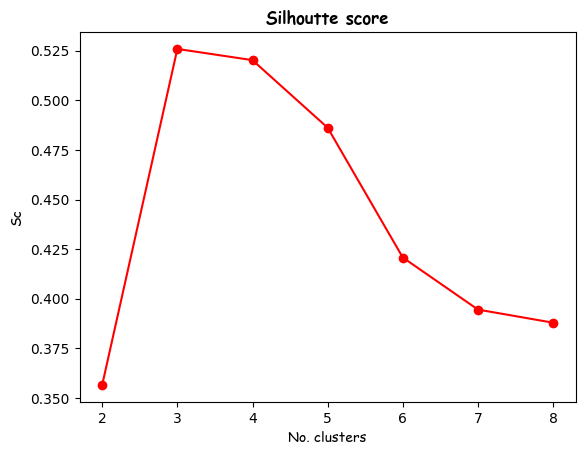

[0.35656859 0.52593424 0.52027262 0.48621861 0.42078853 0.39454525
 0.38793415]


In [11]:
# Lets check the silhouettes method fot our example
training_dat = np.array([[1,2],[2,3],[1,4],[2,3],[7,8],[8,9],[3,5],[4,7],[3,10],[5,8],[4,8],[7,3],[6,2],[4,6],[2,7],[8,3],[9,5],[9,2],[8,2]])

Sc = Silhouttes_method_optimal_cluster(training_dat,8)
print(Sc)

The silhouttes score has a peak at 3 indicating tighter packing in a cluster. 

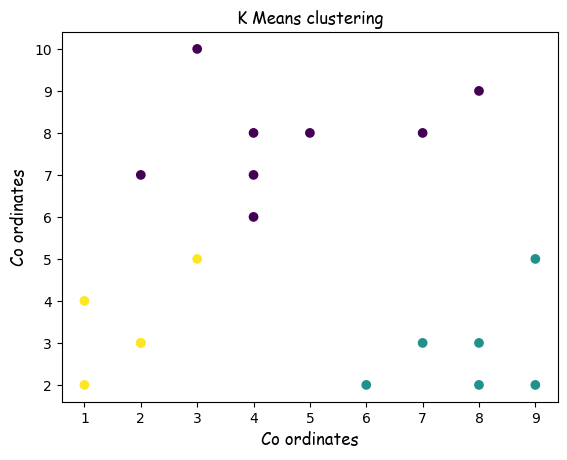

In [12]:
# Lets see how our classification matches with available package.
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(training_dat)

plt.figure()
plt.scatter(training_dat[:,0],training_dat[:,1],c=cluster_labels)
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
plt.xlabel("Co ordinates",font)
plt.ylabel("Co ordinates",font)
plt.title("K Means clustering",font)
plt.show()

From this we see that our own code works well compared for this example with sklearn Kmeans routine. Now lets look at an example for the dataset 'Iris'
for clustering.

In [13]:
# Loading Fisher Iris Sorecies data
Iris_dat = pd.read_csv('Iris.csv')
Iris_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
#Lets take two features Petal width, Petal Length
petal_width = Iris_dat['PetalWidthCm']
petal_length = Iris_dat['PetalLengthCm']
sepal_width = Iris_dat['SepalWidthCm']
sepal_length= Iris_dat['SepalLengthCm']
Train_k = np.stack((sepal_width,sepal_length),axis=1)
Train_k.shape

(150, 2)

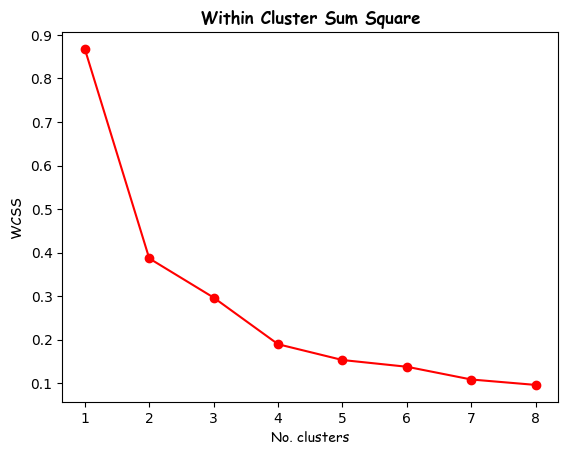

In [15]:
# Finding the optimal clusters needed with our predefined functions
# WCSS
cost_WCSS = Optimal_cluster_count_WCSS(Train_k,8)

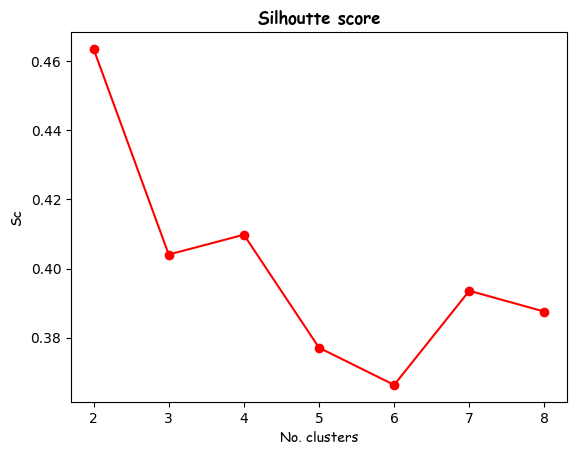

In [16]:
# Silhoutte
cost_Silhouttes = Silhouttes_method_optimal_cluster(Train_k,8)

But since from the dataset we know that 3 clusters are to be present eventhough silhouttes suggest two but from WCSS we see that 3 also works fine.
Visualizing the results on subset of the features

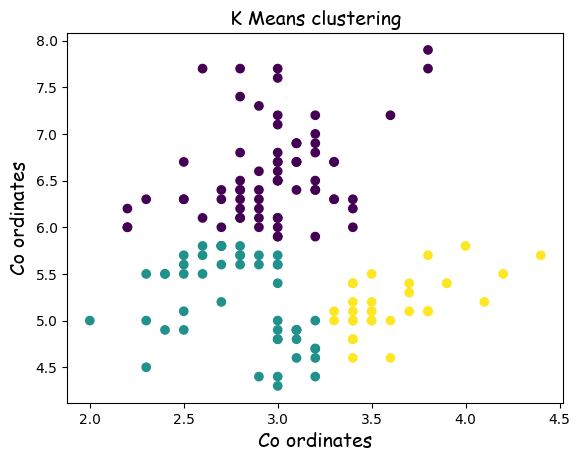

In [17]:
# From this choosing 3 cluster we get(as we know)...
Centroids,indices,costk = Run_K_meanspp(Train_k,3,100)
plt.figure()
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
plt.xlabel("Co ordinates",font)
plt.ylabel("Co ordinates",font)
plt.title("K Means clustering",font)
plt.scatter(sepal_width,sepal_length,c=indices)
plt.show()

Visualizing the same on a higher dimensional data...

In [18]:
# Visualizing Kmeans++ on 3d data
train_4d = np.stack((sepal_length,sepal_width,petal_width,petal_length),axis=1)
train_4d.shape

(150, 4)

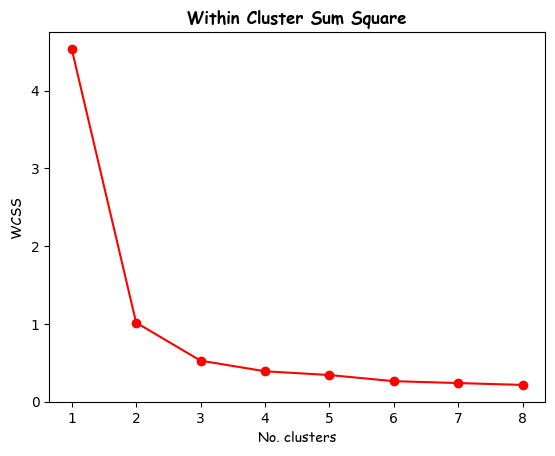

array([4.53882933, 1.01579138, 0.52627228, 0.38956272, 0.34100438,
       0.26185253, 0.23752594, 0.21368227])

In [19]:
# Wcss
Optimal_cluster_count_WCSS(train_4d,8)

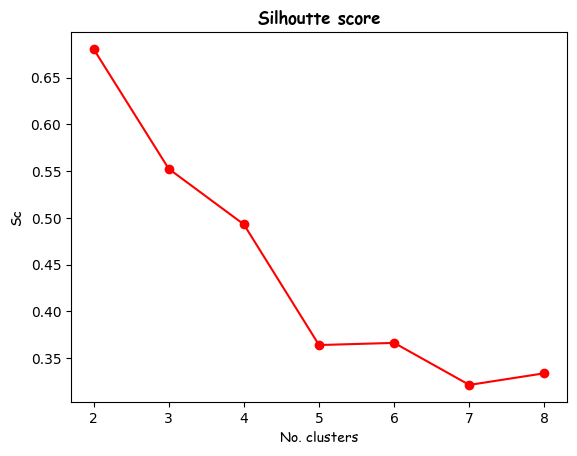

array([0.68081362, 0.55259194, 0.49312949, 0.3641109 , 0.3664106 ,
       0.32145982, 0.33394398])

In [20]:
#Silhoutte
Silhouttes_method_optimal_cluster(train_4d,8)

From the results we got from the previous code cells we will plot the results with a subset of 3 features.

In [21]:
import plotly.express as px

Centroids,indicex,costk = Run_K_meanspp(train_4d,3,100)
fig = px.scatter_3d(x=sepal_length,y=sepal_width,z=petal_width,color=indicex,title='Iris data visualization(own)',
                    labels={'x':'Sepal length (cm)','y':'Sepal Width','z':'Petal width'},category_orders={'indices':['setosa','versicolour','virginica']},
                    width=800,height=700)
fig.update_layout(
    font_family="Comic Sans MS",
    font_color="blue",
    title_font_family="Comic Sans MS",
    title_font_color="black",
    legend_title_font_color="green"
)
fig.show()

Checking our clustering with the available open package...(The cost we found to be similar)

In [22]:
# Using inbuilt libraries to check our algorithm
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(train_4d)
    
fig = px.scatter_3d(x=sepal_length,y=sepal_width,z=petal_width,color=cluster_labels,title='Iris data visualization(Sklearn)',
                    labels={'x':'Sepal length (cm)','y':'Sepal Width','z':'Petal width'},category_orders={'indices':['setosa','versicolour','virginica']},
                    width=800,height=700)
fig.update_layout(
    font_family="Comic Sans MS",
    font_color="blue",
    title_font_family="Comic Sans MS",
    title_font_color="black",
    legend_title_font_color="green"
)
fig.show()

Plotting the actual categories as given in the dataset.

In [23]:
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species',title='Iris data visualization',
                    labels={'x':'Sepal length (cm)','y':'Sepal Width','z':'Petal width'},category_orders={'indices':['setosa','versicolour','virginica']},
                    width=800,height=700)
fig.update_layout(
    font_family="Comic Sans MS",
    font_color="blue",
    title_font_family="Comic Sans MS",
    title_font_color="black",
    legend_title_font_color="green"
)
fig.show()

From the two attached plots we could see that the we have a good clustering but not very accurate...

Looking at a application of this KMeans on image compression.

In [24]:
# Lets look at some applications using this k_means....
## Image compression using clustering of the RGB colours used...
from matplotlib.image import imread
img = imread('bird.png')
img = img[:,:,0:3]
img.shape

(567, 510, 3)

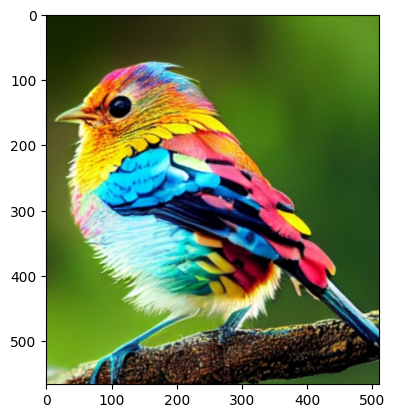

In [25]:
plt.imshow(img)

In [26]:
train_bird = img.reshape(-1,3)
train_bird.shape

(289170, 3)

Clustering the training data of RGB into clusters of 4,8,16,32,64 colours and plotting them... Pls note the below cell takes some time to run because it runs KMeans few times...

In [27]:
Cluster_bird_4,Ind_bird_4,cost_4 = Run_K_meanspp(train_bird,4,1000)
Cluster_bird_8,Ind_bird_8,cost_8 = Run_K_meanspp(train_bird,8,1000)
Cluster_bird_16,Ind_bird_16,cost_16 = Run_K_meanspp(train_bird,16,1000)
Cluster_bird_32,Ind_bird_32,cost_32 = Run_K_meanspp(train_bird,32,1000)
Cluster_bird_64,Ind_bird_64,cost_64 = Run_K_meanspp(train_bird,64,1000)

In [ ]:
#Visualization of clusters for 8 colours
fig = px.scatter_3d(x=train_bird[:,0],y=train_bird[:,1],z=train_bird[:,2],color=Ind_bird_8,
                    title='Bird RGB visualization(own)',width=800,height=700)
fig.update_layout(
    font_family="Comic Sans MS",
    font_color="blue",
    title_font_family="Comic Sans MS",
    title_font_color="black",
    legend_title_font_color="green"
)
fig.show()

Lets finally visualize the results...

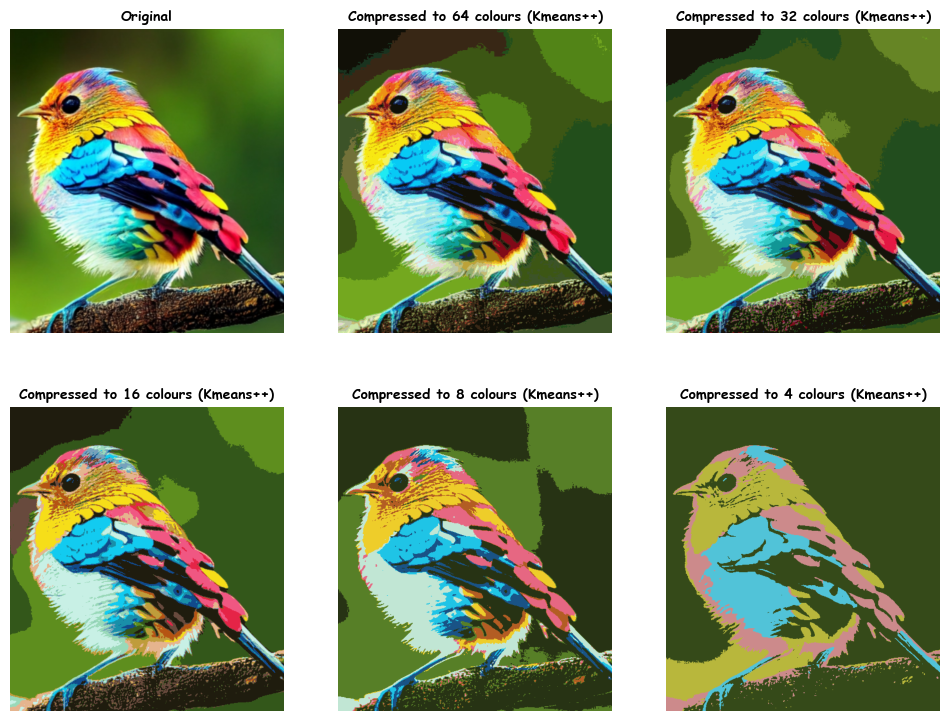

In [29]:
Img_bird_compressed4 = Cluster_bird_4[Ind_bird_4]
Comp_img_4 = Img_bird_compressed4.reshape(img.shape)
Img_bird_compressed8 = Cluster_bird_8[Ind_bird_8]
Comp_img_8 = Img_bird_compressed8.reshape(img.shape)
Img_bird_compressed16 = Cluster_bird_16[Ind_bird_16]
Comp_img_16 = Img_bird_compressed16.reshape(img.shape)
Img_bird_compressed32 = Cluster_bird_32[Ind_bird_32]
Comp_img_32 = Img_bird_compressed32.reshape(img.shape)
Img_bird_compressed64 = Cluster_bird_64[Ind_bird_64]
Comp_img_64 = Img_bird_compressed64.reshape(img.shape)
plt.figure(figsize=(12,9))

plt.subplot(2,3,1)
font = {'family': 'Comic Sans MS',
            'color':  'black',
            'weight': 'normal',
            'size': 8,
            }
bigfont = {'family': 'Comic Sans MS',
            'color':  'black',
            'weight': 'bold',
            'size': 10,
            }
plt.title("Original",bigfont)
plt.axis('off')
plt.imshow(img)
plt.subplot(2,3,2)
plt.title("Compressed to 64 colours (Kmeans++)",bigfont)
plt.axis('off')
plt.imshow(Comp_img_64)
plt.subplot(2,3,3)
plt.title("Compressed to 32 colours (Kmeans++)",bigfont)
plt.axis('off')
plt.imshow(Comp_img_32)
plt.subplot(2,3,4)
plt.title("Compressed to 16 colours (Kmeans++)",bigfont)
plt.axis('off')
plt.imshow(Comp_img_16)
plt.subplot(2,3,5)
plt.title("Compressed to 8 colours (Kmeans++)",bigfont)
plt.axis('off')
plt.imshow(Comp_img_8)
plt.subplot(2,3,6)
plt.title("Compressed to 4 colours (Kmeans++)",bigfont)
plt.axis('off')
plt.imshow(Comp_img_4)
plt.show()

Lets took at another application of the Kmeans++ clustering algorithm...

In [30]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [31]:
# Lets look at X_train and Y_train datasets alone for labelling manually...
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [32]:
train_dig = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
train_dig.shape

(10000, 784)

In [33]:
# Lets try for 100 clusters
Cluster_100,ind_cen_100,cost_mn100 = Run_K_meanspp(train_dig,100,1000)

In [34]:
Cluster_100.shape

(100, 784)

So lets now look at the cluster centers and label them manually... (A kind of semi-supervised learning)


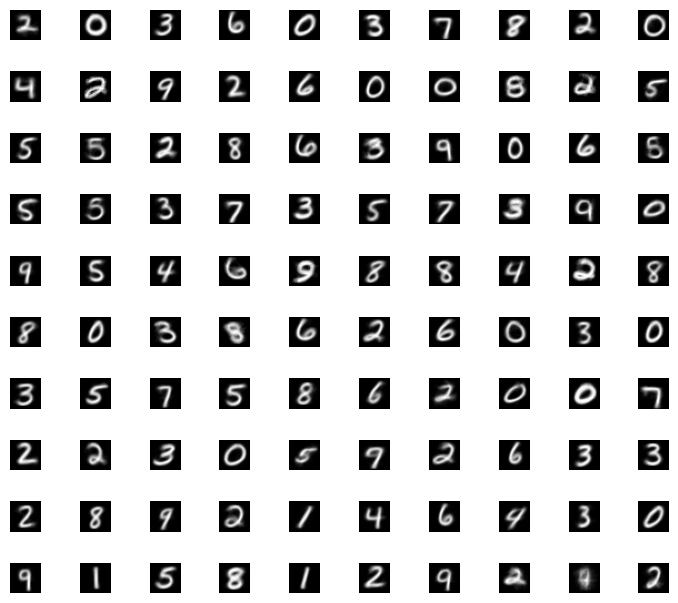

In [35]:
fig, axes = plt.subplots(10,10, figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) 
for i,ax in enumerate(axes.flat):
    X_clus_cen_reshaped = Cluster_100[i].reshape((28,28))
    ax.imshow(X_clus_cen_reshaped, cmap='gray')
    ax.set_axis_off()

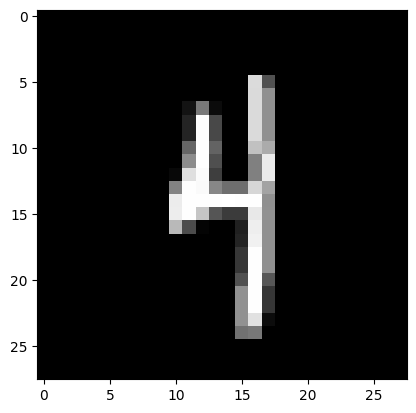

array([33, 70, 94, ..., 42, 19, 14])

In [36]:
plt.figure()
#X_clus_cen_reshaped = Cluster_100[98].reshape((28,28))
X_clus_cen_reshaped = train_dig[65].reshape((28,28))
plt.imshow(X_clus_cen_reshaped, cmap='gray')
plt.show()
ind_cen_100

In [37]:
Y_cluscen100 = np.array([2,0,3,6,0,3,7,8,2,0,
                                        4,2,9,2,6,0,0,8,2,5,
                                        5,5,2,8,6,3,9,0,6,5,
                                        5,5,3,7,3,5,7,3,9,0,
                                        9,5,4,6,9,8,8,4,2,8,
                                        8,0,3,8,6,2,6,0,3,0,
                                        3,5,7,5,8,6,2,0,0,7,
                                        2,2,3,0,5,9,2,6,3,3,
                                        2,8,9,2,1,4,6,4,3,0,
                                        9,1,5,8,1,2,9,2,4,2])
Y_cluscen100.shape

(100,)

In [38]:
Y_estnew100 = Y_cluscen100[ind_cen_100]
Y_estnew100.shape

(10000,)

In [39]:
not_correct100 = np.count_nonzero(Y_estnew100-y_test)
print(f"The accuracy of this way is : {(len(train_dig)-not_correct100)*100/len(train_dig)}")

The accuracy of this way is : 85.09


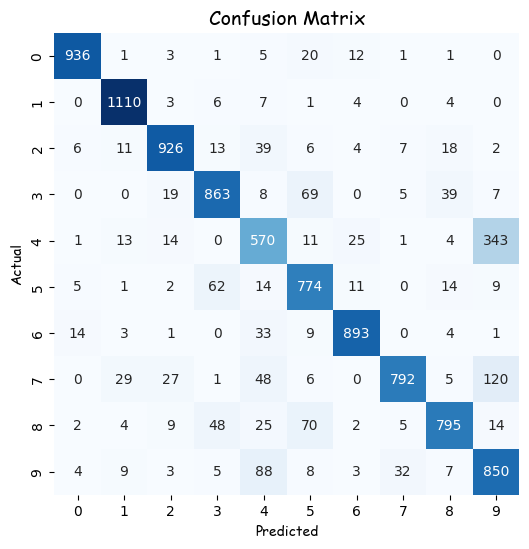

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion = confusion_matrix(y_true=y_test,y_pred=Y_estnew100)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion, annot=True, 
            cbar=False,fmt='1d', cmap='Blues', ax=ax)
bigfont = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }
ax.set_title('Confusion Matrix',bigfont)
ax.set_xlabel('Predicted',font)
ax.set_ylabel('Actual',font)
plt.show()

Many 4-9 and 3-5 and 5-8 are confused by the model of labelling

We could see we get an accuracy of 85.09 % on this data. This type of clustering helps in faster manual labelling of dataset. Here for around 10000 images less than 1500 images are labelled wrong by this clustering method. But this method can be used with logistic regression to yeild better results.


In [41]:
# Lets try for 200 clusters
Cluster_200,ind_cen_200,cost_mn200 = Run_K_meanspp(train_dig,200,1000)

C:\Users\Joeld\AppData\Local\Temp\ipykernel_15376\4220412093.py:2: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



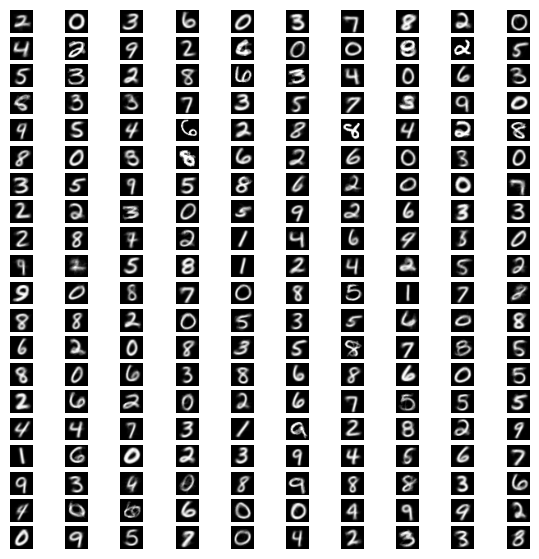

In [42]:
fig, axes = plt.subplots(20,10, figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) 
for i,ax in enumerate(axes.flat):
    X_clus_cen_reshaped = Cluster_200[i].reshape((28,28))
    ax.imshow(X_clus_cen_reshaped, cmap='gray')
    ax.set_axis_off()

In [45]:
Y_cluscen200 = np.array([2,0,3,6,0,3,7,8,2,0,
                                        4,2,9,2,6,0,0,8,2,5,
                                        5,3,2,8,6,3,4,0,6,3,
                                        5,3,3,7,3,5,7,3,9,0,
                                        9,5,4,6,2,8,8,4,2,8,
                                        8,0,3,8,6,2,6,0,3,0,
                                        3,5,9,5,8,6,2,0,0,7,
                                        2,2,3,0,5,9,2,6,3,3,
                                        2,8,7,2,1,4,6,9,3,0,
                                        9,2,5,8,1,2,4,2,5,2,
                                        9,0,8,7,0,8,5,1,7,8,
                                        8,8,2,0,5,3,5,6,0,8,
                                        6,2,0,8,3,6,8,6,0,5,
                                        8,0,6,3,8,6,8,6,0,5,
                                        2,6,2,0,2,6,7,5,5,5,
                                        4,4,7,3,1,9,2,8,2,9,
                                        1,6,0,2,3,9,4,6,6,7,
                                        9,3,4,0,8,9,8,8,3,6,
                                        4,0,0,6,0,0,4,9,9,2,
                                        0,9,5,8,0,4,2,3,3,8])
Y_cluscen200.shape

(200,)

In [46]:
Y_estnew200 = Y_cluscen200[ind_cen_200]
Y_estnew200.shape

(10000,)

In [47]:
not_correct200 = np.count_nonzero(Y_estnew200-y_test)
print(f"The accuracy of this way is : {(len(train_dig)-not_correct200)*100/len(train_dig)}")

The accuracy of this way is : 86.63
